In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [2]:
def uni_runge_kutta(A, a, b, f, u0, t):
    u = [u0]
    for i in range(len(t) - 1):
        tau = t[i + 1] - t[i]
        omega = []
        for j in range(len(a)):
            omega.append(f(u[-1] + tau * sum([A[j][k] * omega[k] for k in range(len(omega))]), t[i] + tau * a[j].item()))
        u.append(u[-1] + tau * sum([omega[k] * b[0][k] for k in range(len(omega))]))
    return u

def cent_diff(f, x0, h=10 ** -5):
    return (f(x0 + h, t[i]) - f(x0 - h, t[i])) / (2 * h)

def uni_rosenbrok(f, u0, alpha, t):
    h = 10**-5
    u =  [u0]
    fu = np.zeros((len(u0), len(u0)))
    for i in range(len(t) - 1):
        tau = t[i + 1] - t[i]
        for j in range(len(u0)):
            du = np.zeros((len(u0), 1))
            du[j] = h
            for k in range(len(u0)):
                fu[j][k] = ((f(u[i] + du, t[i]) - f(u[i] - du, t[i])) / (2*h)) [k][0] 
        w = np.linalg.solve((np.eye(len(fu)) - alpha * tau * fu.T), f(u[i], t[i] + tau/2))
        u.append(u[i] + tau * np.real(w))
    return u

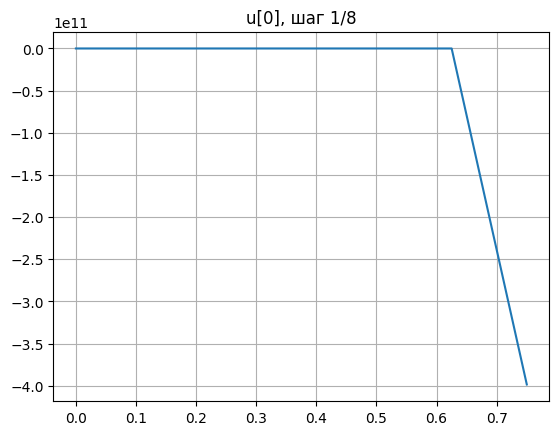

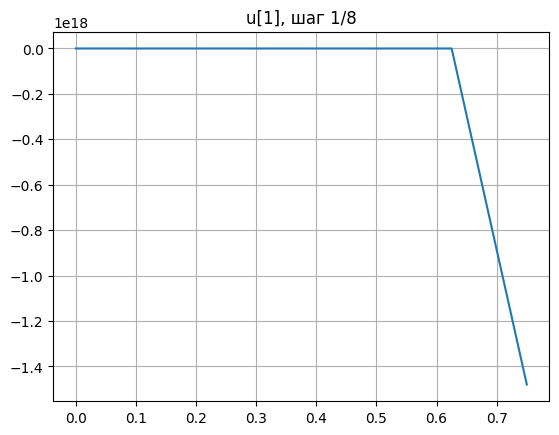

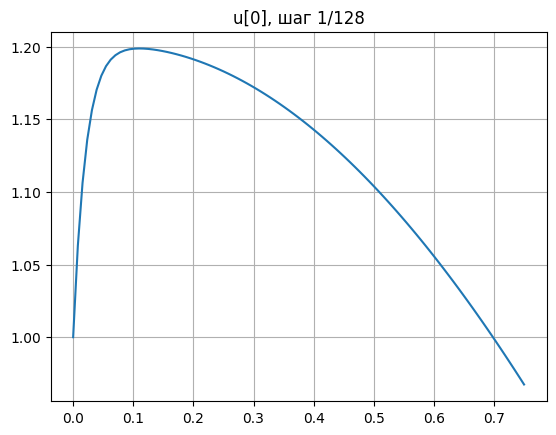

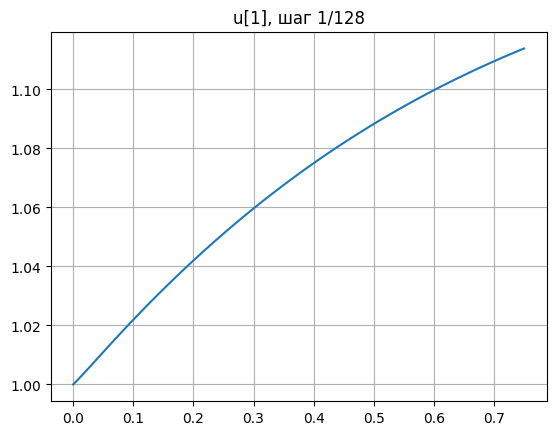

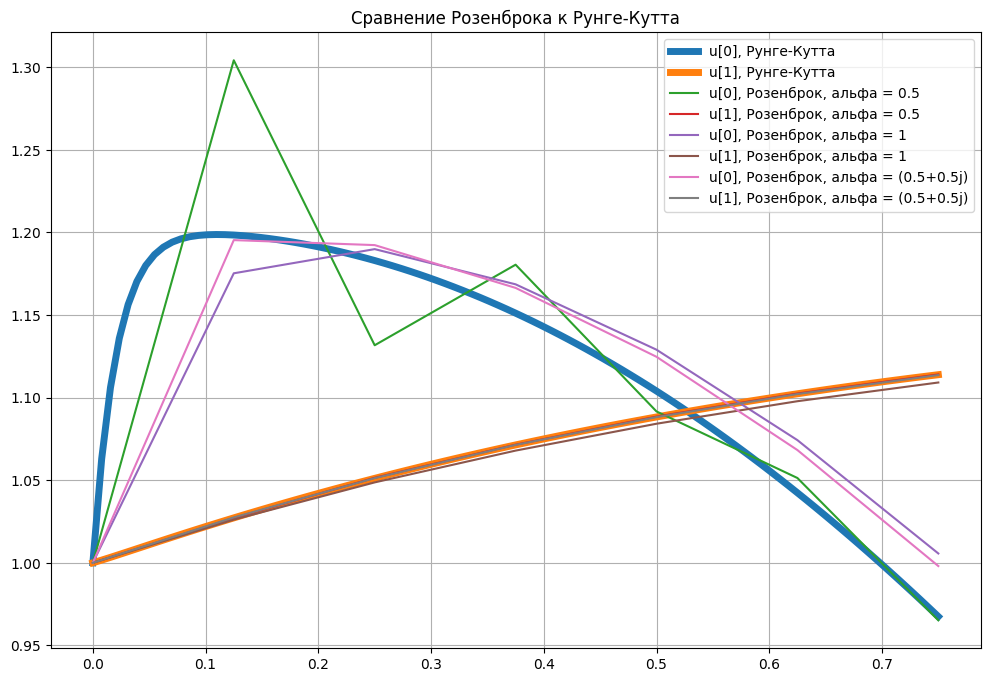

In [6]:
A = np.array([[0, 0], [0.5, 0]])
a = np.array([[0], [0.5]])
b = np.array([[0, 1]])

f = lambda u, t: np.array([[-50 * (u[0][0] - np.cos(t)) + 10 * u[1][0]], [1.2 * u[0][0] - u[1][0] * u[0][0]]])
u0 = np.array([[1], [1]])
border = (0, 0.75)
t_1 = np.linspace(border[0], border[1], int(8 * (border[1] - border[0]) + 1))
t_2 = np.linspace(border[0], border[1], int(128 * (border[1] - border[0]) + 1))

u = uni_runge_kutta(A, a, b, f, u0, t_1)
print()
plt.figure()
plt.plot(t_1, [i[0][0] for i in u])
plt.title("u[0], шаг 1/8")
plt.grid(True)
plt.figure()
plt.plot(t_1, [i[1][0] for i in u])
plt.title("u[1], шаг 1/8")
plt.grid(True)

u = uni_runge_kutta(A, a, b, f, u0, t_2)
print()
plt.figure()
plt.plot(t_2, [i[0][0] for i in u])
plt.title("u[0], шаг 1/128")
plt.grid(True)
plt.figure()
plt.plot(t_2, [i[1][0] for i in u])
plt.title("u[1], шаг 1/128")
plt.grid(True)

plt.figure(figsize=(12, 8))
plt.title("Сравнение Розенброка к Рунге-Кутта")
plt.plot(t_2, [i[0][0] for i in u], label="u[0], Рунге-Кутта", linewidth=5)
plt.plot(t_2, [i[1][0] for i in u], label="u[1], Рунге-Кутта", linewidth=5)
plt.grid(True)

alphas = [0.5, 1, (1 + 1j) / 2]
for alpha in alphas:
    u = uni_rosenbrok(f, u0, alpha, t_1)
    plt.plot(t_1, [i[0][0] for i in u], label=f"u[0], Розенброк, альфа = {alpha}")
    plt.plot(t_1, [i[1][0] for i in u], label=f"u[1], Розенброк, альфа = {alpha}")
plt.legend();